# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**WARNING**: This notebook was AI-generated using `dandi-notebook-gen` and has not been fully verified. Please use caution when interpreting the code or results.

This notebook provides an exploratory analysis of Dandiset 001174 (Calcium imaging in SMA and M1 of macaques).

Neurosift link: https://neurosift.app/dandiset/001174

In this notebook, we will:
- Connect to the DANDI archive and list assets.
- Load and inspect a representative NWB file.
- Visualize raw imaging frames.
- Explore event amplitude and fluorescence responses.
- Visualize ROI masks.
- Summarize findings and propose future directions.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Connecting to the DANDI archive and listing assets

In [2]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dataset")
print("First 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 45 assets in the dataset
First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb


## Loading a representative NWB file

We will load the NWB file at path `sub-F/sub-F_ses-20240213T110430_ophys.nwb` using its asset ID.

In [3]:
import remfile
import h5py
import pynwb

# Hard-code asset ID and URL for demonstration
asset_id = "193fee16-550e-4a8f-aab8-2383f6d57a03"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Loading NWB file from URL: {url}")

remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file from URL: https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/


### NWB File metadata

In [4]:
print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("Timestamps reference time:", nwb.timestamps_reference_time)

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
Session start time: 2024-02-13 11:04:30.267000+00:00
Timestamps reference time: 2024-02-13 11:04:30.267000+00:00


## Visualizing raw imaging frames

Raw data shape: (6026, 1280, 800)


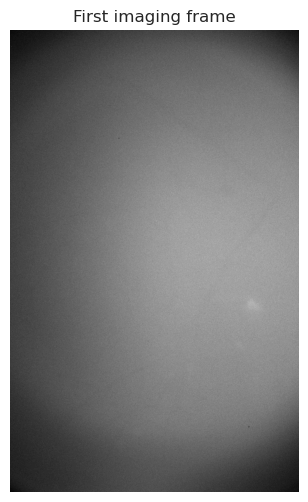

In [5]:
ops = nwb.acquisition["OnePhotonSeries"]
print("Raw data shape:", ops.data.shape)
frame0 = ops.data[0, :, :]
plt.figure(figsize=(6,6))
plt.imshow(frame0, cmap='gray')
plt.title("First imaging frame")
plt.axis('off')
plt.show()

## Exploring event amplitudes

EventAmplitude data shape: (6026, 6)


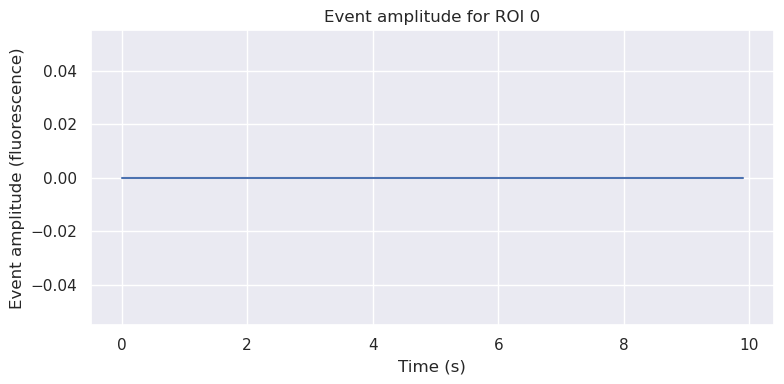

In [6]:
ev = nwb.processing["ophys"].data_interfaces["EventAmplitude"]
print("EventAmplitude data shape:", ev.data.shape)
# Plot the first 100 time points for ROI 0
time_ev = ev.starting_time + np.arange(100) / ev.rate
plt.figure(figsize=(8,4))
plt.plot(time_ev, ev.data[:100, 0])
plt.xlabel("Time (s)")
plt.ylabel("Event amplitude (fluorescence)")
plt.title("Event amplitude for ROI 0")
plt.tight_layout()
plt.show()

## Fluorescence time series

Fluorescence data shape: (6026, 6)


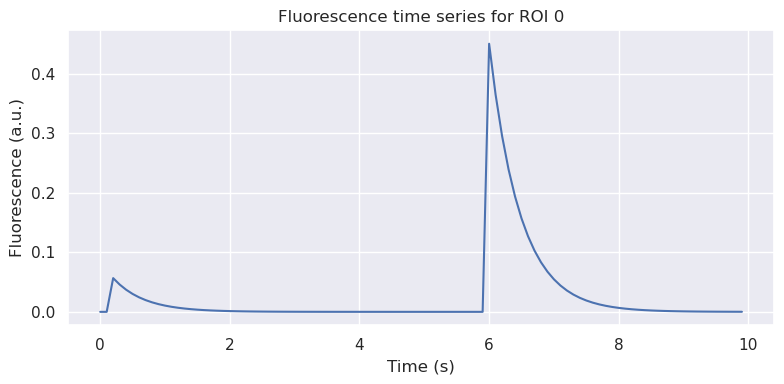

In [7]:
frs = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["RoiResponseSeries"]
print("Fluorescence data shape:", frs.data.shape)
# Plot first 100 samples for ROI 0
time_frs = frs.starting_time + np.arange(100) / frs.rate
plt.figure(figsize=(8,4))
plt.plot(time_frs, frs.data[:100, 0])
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (a.u.)")
plt.title("Fluorescence time series for ROI 0")
plt.tight_layout()
plt.show()

## ROI mask visualization

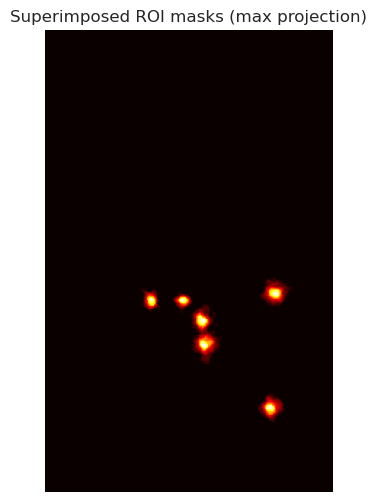

In [8]:
ps = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
df_masks = ps.to_dataframe()
# Each row's 'image_mask' is a 2D array mask
masks = df_masks['image_mask'].to_list()
# Compute max projection across all masks
stacked = np.stack(masks, axis=0)
supermask = np.max(stacked, axis=0)
plt.figure(figsize=(6,6))
plt.imshow(supermask, cmap='hot')
plt.title("Superimposed ROI masks (max projection)")
plt.axis('off')
plt.show()

## Summary and future directions

In this notebook, we demonstrated how to:
- Connect to DANDI and list assets.
- Load and inspect an NWB file.
- Visualize raw imaging frames.
- Explore event amplitude and fluorescence time series.
- Visualize ROI masks.

Possible future analyses include:
- Interactive exploration of multiple sessions.
- Quantitative analysis of synchrony between ROIs.
- Correlating imaging data with behavioral metrics.